In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the file path
file_path = r"C:\Users\nihar\OneDrive\Desktop\Bootcamp\SCMA 632\DataSet\IPL_ball_by_ball_updated till 2024.csv"

In [5]:
# Load the dataset with specified data types
ipl_data = pd.read_csv(file_path, low_memory=False)


In [35]:
# Display the first few rows of the dataset
ipl_data.head()

,Match id,Date,Season,Batting team,Bowling team,Innings No,Ball No,Bowler,Striker,Non Striker,runs_scored,extras,type of extras,score,score/wicket,wicket_confirmation,wicket_type,fielders_involved,Player Out
0,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.1,P Kumar,SC Ganguly,BB McCullum,0,1,legbyes,1,1/0,0,NaN,NaN,NaN
1,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,1,1/0,0,NaN,NaN,NaN
2,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,1,wides,2,2/0,0,NaN,NaN,NaN
3,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.3,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN
4,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.4,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN


In [7]:
# Define relevant columns for filtering and analysis
batsman_column = 'Striker'
bowler_column = 'Bowler'
runs_column = 'runs_scored'
wickets_column = 'wicket_confirmation'  # Using the wicket_confirmation column for wickets taken

In [9]:
# Filter data for the assigned player (SP Narine)
player_name = 'SP Narine'
batting_data = ipl_data[ipl_data[batsman_column] == player_name]
bowling_data = ipl_data[ipl_data[bowler_column] == player_name]

Batting Mean (mu): 1.5480349344978166
Batting Standard Deviation (sigma): 2.038088855321498


C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


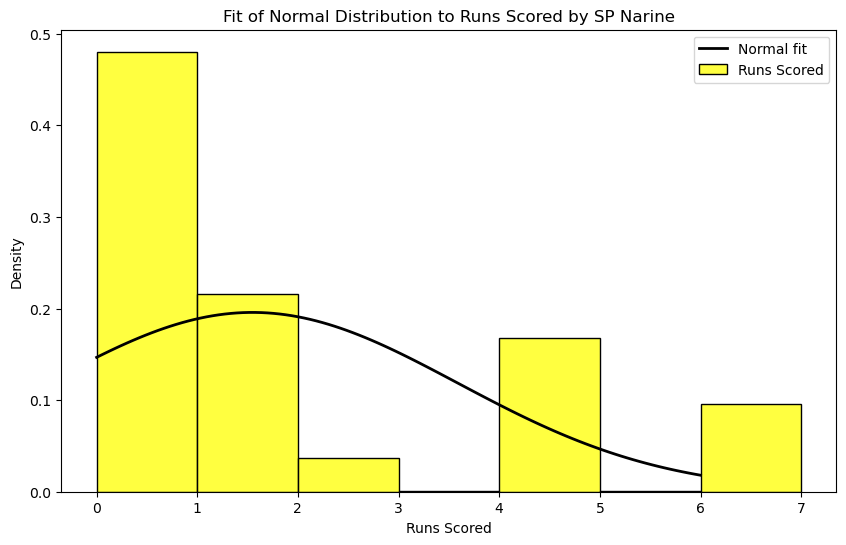

In [11]:
# Analyze batting performance (runs scored)
if batting_data.empty:
    print(f"No batting data found for player: {player_name}")
else:
    runs_scored = batting_data[runs_column].replace([np.inf, -np.inf], np.nan).dropna()
    if runs_scored.empty:
        print(f"Runs scored data is empty after cleaning for player: {player_name}")
    else:
        (mu_batting, sigma_batting) = stats.norm.fit(runs_scored)
        print(f"Batting Mean (mu): {mu_batting}")
        print(f"Batting Standard Deviation (sigma): {sigma_batting}")
        plt.figure(figsize=(10, 6))
        sns.histplot(runs_scored, bins=range(int(runs_scored.min()), int(runs_scored.max()) + 2), kde=False, color='yellow', stat='density', label='Runs Scored')
        x = np.linspace(runs_scored.min(), runs_scored.max(), 100)
        p = stats.norm.pdf(x, mu_batting, sigma_batting)
        plt.plot(x, p, 'k', linewidth=2, label='Normal fit')
        plt.xlabel('Runs Scored')
        plt.ylabel('Density')
        plt.title(f'Fit of Normal Distribution to Runs Scored by {player_name}')
        plt.legend()
        plt.show()

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


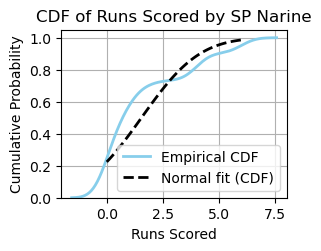

In [25]:
# Cumulative Distribution Function (CDF)
plt.subplot(2, 2, 2)
sns.kdeplot(runs_scored, cumulative=True, color='skyblue', linewidth=2, label='Empirical CDF')
x = np.linspace(runs_scored.min(), runs_scored.max(), 100)
p = stats.norm.cdf(x, mu_batting, sigma_batting)
plt.plot(x, p, 'k--', linewidth=2, label='Normal fit (CDF)')
plt.xlabel('Runs Scored')
plt.ylabel('Cumulative Probability')
plt.title(f'CDF of Runs Scored by {player_name}')
plt.legend()
plt.grid(True)

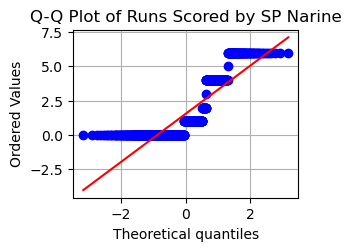

In [27]:
# Quantile-Quantile (Q-Q) plot
plt.subplot(2, 2, 3)
stats.probplot(runs_scored, dist="norm", plot=plt)
plt.title(f'Q-Q Plot of Runs Scored by {player_name}')
plt.grid(True)